In [73]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [74]:
train = pd.read_csv("titanic/train.csv")

In [75]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
test = pd.read_csv("titanic/test.csv")

In [77]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
submission = pd.read_csv("titanic/gender_submission.csv")

In [79]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
train.shape, test.shape

((891, 12), (418, 11))

In [82]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [84]:
data = pd.concat([train,test])

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


<AxesSubplot:ylabel='Frequency'>

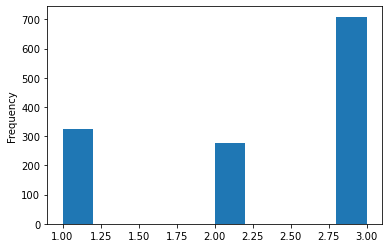

In [87]:
data["Pclass"].plot(kind = 'hist')

In [88]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
data["Ticket"].plot(kind = 'hist')

TypeError: no numeric data to plot

In [90]:
data["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
A36                1
B4                 1
A29                1
B37                1
D47                1
Name: Cabin, Length: 186, dtype: int64

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

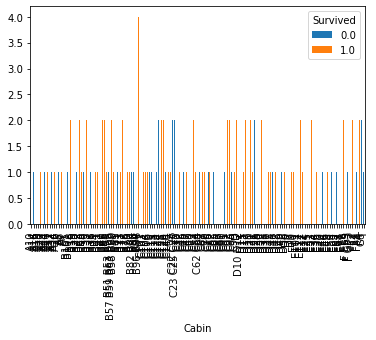

In [91]:
pd.crosstab(data["Cabin"],data['Survived']).plot(kind = "bar")
data.columns

<AxesSubplot:xlabel='Pclass'>

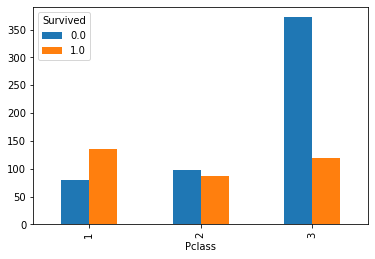

In [92]:
pd.crosstab(data["Pclass"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='Sex'>

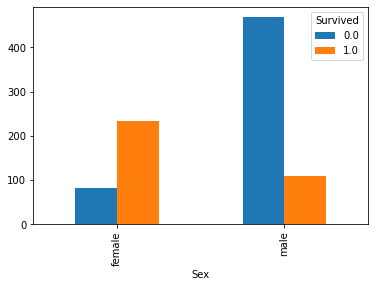

In [93]:
pd.crosstab(data["Sex"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='Age'>

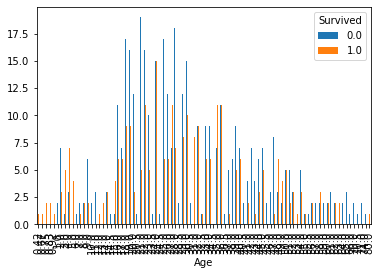

In [98]:
pd.crosstab(data["Age"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='Parch'>

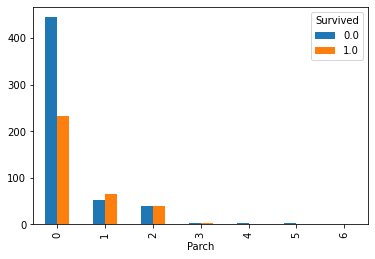

In [99]:
pd.crosstab(data["Parch"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='Ticket'>

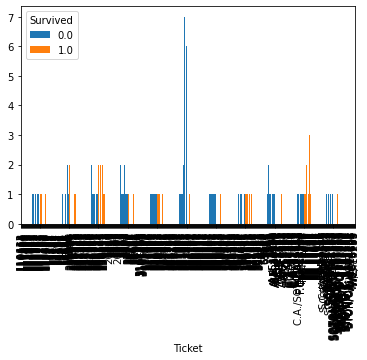

In [106]:
pd.crosstab(data["Ticket"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='Fare'>

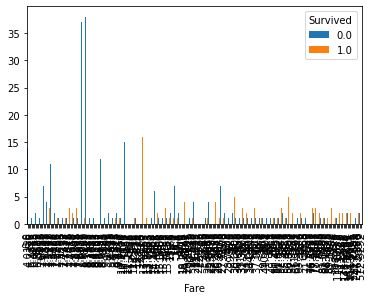

In [107]:
pd.crosstab(data["Fare"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='Embarked'>

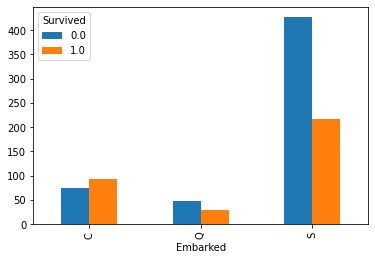

In [108]:
pd.crosstab(data["Embarked"],data['Survived']).plot(kind = "bar")

<AxesSubplot:xlabel='SibSp'>

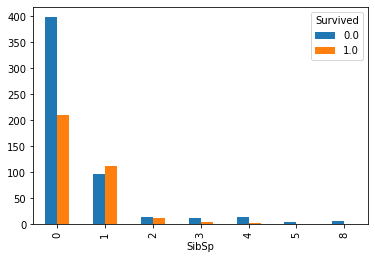

In [109]:
pd.crosstab(data["SibSp"],data['Survived']).plot(kind = "bar")

In [111]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<AxesSubplot:>

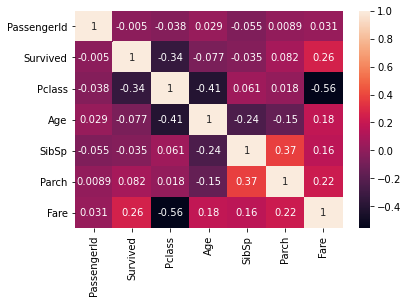

In [112]:
sbn.heatmap(data.corr(),annot=True)

In [113]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [114]:
data["Age"].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

In [116]:
data["Age"].fillna(data['Age'].mean(), inplace = True)

In [117]:
data.reset_index().drop(columns="index")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


In [118]:
data[data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


In [119]:
data.groupby('Fare').Cabin

In [120]:
import scipy
data.pivot_table(values="Fare", index = "Cabin",aggfunc = scipy.stats.mode)

,Fare
Cabin,
A10,"([40.125], [1])"
A11,"([27.7208], [1])"
A14,"([52.0], [1])"
A16,"([39.6], [1])"
A18,"([29.7], [1])"
...,...
F33,"([10.5], [3])"
F38,"([7.75], [1])"
F4,"([39.0], [4])"


In [121]:
data['Cabin'].mode()[0]

'C23 C25 C27'

In [122]:
data["Cabin"].fillna(data['Cabin'].mode()[0], inplace = True)

In [123]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
dtype: int64

In [124]:
data[data['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,C23 C25 C27,S


In [130]:
data[data['Cabin'] == 'C23 C25 C27'].Fare[0]

0    7.2500
0    7.8292
Name: Fare, dtype: float64

In [134]:
data['Fare'].fillna(0, inplace=True)

In [139]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [138]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [140]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025731,-0.055224,0.008942,0.030905
Survived,-0.005007,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.366371,0.060832,0.018322,-0.558803
Age,0.025731,-0.070323,-0.366371,1.000000,-0.190747,-0.130872,0.170325
SibSp,-0.055224,-0.035322,0.060832,-0.190747,1.000000,0.373587,0.160434
Parch,0.008942,0.081629,0.018322,-0.130872,0.373587,1.000000,0.221706
Fare,0.030905,0.257307,-0.558803,0.170325,0.160434,0.221706,1.000000


In [142]:
num_col = data.select_dtypes(include=np.number).columns

In [143]:
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [150]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['Name']).columns

In [151]:
cat_col

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [152]:
data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [154]:
cat_col_tranform = pd.get_dummies(data[cat_col])

In [155]:
data_preprocessed_cat_num = pd.concat([cat_col_tranform, data[num_col]], axis = 1)

In [156]:
train_preprocessd = data_preprocessed_cat_num.dropna(subset=["Survived"])

In [157]:
test_preprocessd = data_preprocessed_cat_num[data_preprocessed_cat_num["Survived"].isna()]

In [158]:
test_preprocessd = test_preprocessd.drop(columns="Survived")

In [159]:
test_preprocessd

,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,892,3,34.500000,0,0,7.8292
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,893,3,47.000000,1,0,7.0000
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,894,2,62.000000,0,0,9.6875
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,895,3,27.000000,0,0,8.6625
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,896,3,22.000000,1,1,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1305,3,29.881138,0,0,8.0500
414,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1306,1,39.000000,0,0,108.9000
415,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1307,3,38.500000,0,0,7.2500
416,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1308,3,29.881138,0,0,8.0500


In [160]:
test_preprocessd

,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,892,3,34.500000,0,0,7.8292
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,893,3,47.000000,1,0,7.0000
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,894,2,62.000000,0,0,9.6875
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,895,3,27.000000,0,0,8.6625
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,896,3,22.000000,1,1,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1305,3,29.881138,0,0,8.0500
414,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1306,1,39.000000,0,0,108.9000
415,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1307,3,38.500000,0,0,7.2500
416,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1308,3,29.881138,0,0,8.0500


In [161]:
train_preprocessd

,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,...,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0.0,3,22.000000,1,0,7.2500
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,2,1.0,1,38.000000,1,0,71.2833
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1.0,3,26.000000,0,0,7.9250
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,4,1.0,1,35.000000,1,0,53.1000
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,0,0,0,...,0,0,1,887,0.0,2,27.000000,0,0,13.0000
887,1,0,0,0,0,0,0,0,0,0,...,0,0,1,888,1.0,1,19.000000,0,0,30.0000
888,1,0,0,0,0,0,0,0,0,0,...,0,0,1,889,0.0,3,29.881138,1,2,23.4500
889,0,1,0,0,0,0,0,0,0,0,...,1,0,0,890,1.0,1,26.000000,0,0,30.0000


In [166]:
X = train_preprocessd.drop(columns=["Survived"])

In [167]:
y = train["Survived"]

In [168]:
logistic_model = LogisticRegression()

In [169]:
logistic_model.fit(X,y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
logistic_model.coef_

array([[ 2.21037579e+00, -6.93115998e-01,  4.93806024e-02, ...,
        -7.63924925e-02, -2.31608569e-01,  1.61147073e-03]])

<AxesSubplot:>

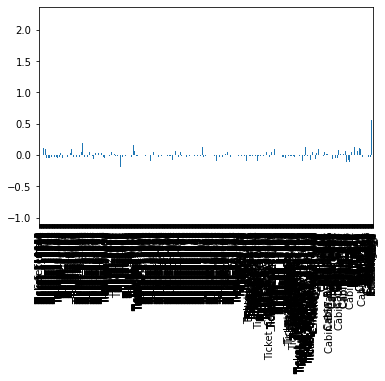

In [171]:
pd.Series(data = logistic_model.coef_[0],index=X.columns).plot(kind = "bar")

In [172]:
accuracy_score(y, logistic_model.predict(X))

0.819304152637486

In [173]:
confusion_matrix(y, logistic_model.predict(X))

array([[473,  76],
       [ 85, 257]], dtype=int64)

In [177]:
test_X = test_preprocessd

In [178]:
test_pred=logistic_model.predict(test_X)

In [182]:
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [184]:
submission['Survived'].tail()

413    0
414    1
415    0
416    0
417    0
Name: Survived, dtype: int64

In [180]:
submission["Survived"] = test_pred

In [185]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [187]:
submission.to_csv("Titanic_logistic.csv",index = False)